In [1]:
import pickle
import numpy as np

def compute_and_save_frame_differences(pkl_file_path, output_pkl_path, point_type="hand_right"):
    """
    Compute differences between consecutive frames (x2 - x1, y2 - y1) and save the results.

    Parameters:
        pkl_file_path (str): Path to the input filtered pkl file.
        output_pkl_path (str): Path to save the differences as a new pkl file.
        point_type (str): Keypoint type to process (e.g., 'hand_right', 'pose', etc.).

    Returns:
        None
    """
    # Load the filtered dataset
    with open(pkl_file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Extract the keypoints for the specified type
    keypoints = data[point_type]  # e.g., 'hand_right' (shape: frames x points x 3)

    # Compute the frame-to-frame differences
    # Differences for X and Y coordinates only
    frame_differences = keypoints[1:, :, :2] - keypoints[:-1, :, :2]  # Shape: (frames-1, points, 2)

    # Prepare a dictionary to save the results
    differences_data = {
        "frame_differences": frame_differences,  # Delta between frames
        "point_type": point_type,  # Metadata about the type of keypoints
    }

    # Save the differences to a new pkl file
    with open(output_pkl_path, 'wb') as f:
        pickle.dump(differences_data, f)

    print(f"Frame-to-frame differences saved to: {output_pkl_path}")


# Example usage
pkl_file_path = "/nas/Chingiz/sing_language/newDATA_points/output_filtered_threshold.pkl"
output_pkl_path = "/nas/Chingiz/sing_language/newDATA_points/frame_differences_threshold.pkl"
point_type = "hand_right"  # Change to 'pose', 'hand_left', or 'face' as needed

compute_and_save_frame_differences(pkl_file_path, output_pkl_path, point_type)


Frame-to-frame differences saved to: /nas/Chingiz/sing_language/newDATA_points/frame_differences_threshold.pkl


In [2]:
import pickle
def read_pkl(path):
    with open(path, 'rb') as f:
        data1 = pickle.load(f)
    return data1

path = '/nas/Chingiz/sing_language/newDATA_points/frame_differences_threshold.pkl' 

data_vector = read_pkl(path)


In [3]:
len(data_vector)

2

In [5]:
data_vector['frame_differences'][:3]

array([[[-125.672,   12.299],
        [   0.703,  -71.583],
        [ -73.457,  -49.425],
        [ -57.016,  -73.113],
        [ -55.32 ,  -90.503],
        [ -21.269,  -89.747],
        [  10.335, -105.148],
        [   0.383,  -87.72 ],
        [   8.5  ,  -80.745],
        [  24.301, -115.969],
        [  13.657, -103.452],
        [  49.862,  -72.874],
        [  15.422,  -50.789],
        [  28.263, -141.546],
        [  14.435,  -43.111],
        [  15.422,  -66.399],
        [  14.504,  -48.037],
        [  -8.497, -147.327],
        [  90.638,  -94.002],
        [  22.76 ,  -72.127],
        [   0.745,  -62.452]],

       [[  45.684,  -45.883],
        [ -69.207,    7.98 ],
        [ -20.881,  -73.331],
        [  99.413, -129.061],
        [  71.699,   -0.467],
        [ 120.174,  -88.087],
        [  48.617,  -89.829],
        [  57.767, -107.257],
        [  79.954,   -0.327],
        [ -22.426,  -10.98 ],
        [  33.444,  -59.433],
        [   3.174,  -70.463],
        

In [6]:
data_vector.keys()

dict_keys(['frame_differences', 'point_type'])

In [7]:
data_vector['point_type'] #/100

'hand_right'

In [8]:
import pickle
import numpy as np

def save_scaled_deltas(input_pkl_file, output_pkl_file, scaling_factor=60):
    """
    Save scaled delta values for all joints in the 'frame_differences' key of the input pkl file.

    Parameters:
        input_pkl_file (str): Path to the input pkl file containing frame differences.
        output_pkl_file (str): Path to save the scaled delta values.
        scaling_factor (float): Factor to scale the delta values (default: 100).

    Returns:
        None
    """
    # Load the delta dataset
    with open(input_pkl_file, 'rb') as f:
        data = pickle.load(f)

    # Validate the required keys
    if 'frame_differences' not in data or 'point_type' not in data:
        raise KeyError("The input file must contain 'frame_differences' and 'point_type' keys.")

    # Extract frame differences
    deltas = data['frame_differences']  # Shape: (frames-1, points, 2)

    # Scale the delta values
    scaled_deltas = deltas / scaling_factor  # Shape remains (frames-1, points, 2)

    # Save the scaled deltas along with metadata
    scaled_data = {
        "scaled_deltas": scaled_deltas,  # Scaled delta values
        "point_type": data['point_type'],  # Metadata about the keypoint type
    }
    with open(output_pkl_file, 'wb') as f:
        pickle.dump(scaled_data, f)

    print(f"Scaled deltas saved to: {output_pkl_file}")
    print(f"Shape of scaled deltas: {scaled_deltas.shape}")


# Example usage
input_pkl_file = "/nas/Chingiz/sing_language/newDATA_points/frame_differences_threshold.pkl"
output_pkl_file = "/nas/Chingiz/sing_language/newDATA_points/scaled_deltas_threshold.pkl"

save_scaled_deltas(input_pkl_file, output_pkl_file, scaling_factor=60)


Scaled deltas saved to: /nas/Chingiz/sing_language/newDATA_points/scaled_deltas_threshold.pkl
Shape of scaled deltas: (70, 21, 2)


In [21]:
import pickle
def read_pkl(path):
    with open(path, 'rb') as f:
        data1 = pickle.load(f)
    return data1

path_delta = '/nas/Chingiz/sing_language/newDATA_points/scaled_deltas_threshold.pkl' 

data_vector_delta = read_pkl(path_delta)


In [22]:
data_vector_delta

{'scaled_deltas': array([[[-2.09453333,  0.20498333],
         [ 0.01171667, -1.19305   ],
         [-1.22428333, -0.82375   ],
         ...,
         [ 1.51063333, -1.5667    ],
         [ 0.37933333, -1.20211667],
         [ 0.01241667, -1.04086667]],
 
        [[ 0.7614    , -0.76471667],
         [-1.15345   ,  0.133     ],
         [-0.34801667, -1.22218333],
         ...,
         [ 0.61458333, -1.87506667],
         [ 0.68798333, -1.6005    ],
         [ 1.5317    , -0.11246667]],
 
        [[ 0.01481667, -0.41323333],
         [ 0.60185   , -0.74235   ],
         [ 1.81528333, -0.6389    ],
         ...,
         [-1.47008333,  1.32265   ],
         [-0.53235   ,  0.66671667],
         [-1.12931667, -1.10806667]],
 
        ...,
 
        [[-0.01235   , -0.00278333],
         [ 0.04951667,  0.0045    ],
         [-0.0571    ,  0.00938333],
         ...,
         [ 0.0622    ,  0.00453333],
         [-0.03801667, -0.05288333],
         [-0.10651667, -0.06618333]],
 
        [[-0

In [23]:
import matplotlib.pyplot as plt
plt.hist(data_vector_delta[..., 0].flatten(), bins=50, alpha=0.5, label="X Deltas")
plt.hist(data_vector_delta[..., 1].flatten(), bins=50, alpha=0.5, label="Y Deltas")
plt.legend()
plt.show()


KeyError: (Ellipsis, 0)

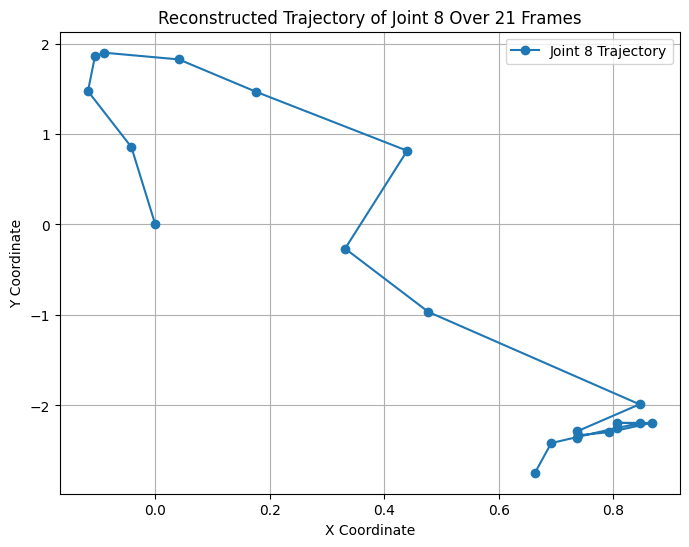

In [24]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Function to load data and reconstruct trajectory
def load_and_plot_trajectory(pkl_file_path, joint_index=8):
    """
    Load scaled delta dataset and plot the reconstructed trajectory for a specified joint.

    Parameters:
        pkl_file_path (str): Path to the saved scaled deltas pkl file.
        joint_index (int): Index of the joint to plot (default: 8 for joint 9).
        scaling_factor (float): Scale factor to adjust the deltas for trajectory reconstruction.

    Returns:
        None
    """
    # Load the saved dataset
    with open(pkl_file_path, 'rb') as f:
        data = pickle.load(f)

    # Extract scaled deltas
    deltass = data['scaled_deltas'][50:70, joint_index, :]  # Shape: (frames-1, 2)

    # Number of frames in the dataset
    num_frames = deltass.shape[0]

    # Initialize the starting position (e.g., (0, 0))
    trajectory = np.zeros((num_frames + 1, 2))  # Absolute positions
    for i in range(1, num_frames + 1):
        trajectory[i] = trajectory[i - 1] + deltass[i - 1]  # Accumulate deltas

    # Extract x and y coordinates for plotting
    x_coords = trajectory[:, 0]
    y_coords = trajectory[:, 1]

    # Plot the reconstructed trajectory
    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, marker='o', linestyle='-', label=f'Joint {joint_index} Trajectory')
    plt.title(f"Reconstructed Trajectory of Joint {joint_index} Over {num_frames + 1} Frames")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.legend()
    plt.show()


# Example usage
pkl_file_path = "/nas/Chingiz/sing_language/newDATA_points/scaled_deltas_threshold.pkl"
load_and_plot_trajectory(pkl_file_path, joint_index=8)


In [12]:
# import pickle
# import numpy as np

# def convert_deltas_to_discrete(input_pkl_file, output_pkl_file, threshold=0.3):
#     """
#     Convert delta values to discrete values (-1, 0, 1) and save to a new file.

#     Parameters:
#         input_pkl_file (str): Path to the input pkl file containing scaled deltas.
#         output_pkl_file (str): Path to save the discrete delta values.
#         threshold (float): Threshold for considering values close to zero as no movement (default: 1e-5).

#     Returns:
#         None
#     """
#     # Load the scaled deltas dataset
#     with open(input_pkl_file, 'rb') as f:
#         data = pickle.load(f)

#     # Extract scaled deltas
#     scaled_deltas = data['scaled_deltas']  # Shape: (frames-1, points, 2)

#     # Convert to discrete values
#     # -1 for negative, 0 for near-zero, 1 for positive
#     discrete_deltas = np.where(
#         np.abs(scaled_deltas) < threshold, 0,  # Near-zero threshold
#         np.where(scaled_deltas > 0, 1, -1)    # Positive or negative movement
#     )

#     # Save the discrete deltas to a new file
#     discrete_data = {
#         "discrete_deltas": discrete_deltas,  # Discrete delta values
#         "point_type": data['point_type'],    # Metadata about the keypoint type
#     }
#     with open(output_pkl_file, 'wb') as f:
#         pickle.dump(discrete_data, f)

#     print(f"Discrete deltas saved to: {output_pkl_file}")
#     print(f"Shape of discrete deltas: {discrete_deltas.shape}")


# # Example usage
# input_pkl_file = "/nas/Chingiz/sing_language/newDATA_points/scaled_deltas_threshold.pkl"
# output_pkl_file = "/nas/Chingiz/sing_language/newDATA_points/discrete_deltas_threshold.pkl"

# convert_deltas_to_discrete(input_pkl_file, output_pkl_file, threshold=0.1)


In [13]:
import pickle
import numpy as np

def convert_deltas_to_discrete(input_pkl_file, output_pkl_file, x_threshold=0.3, y_threshold=0.3):
    """
    Convert delta values to discrete values (-1, 0, 1) for x and y separately based on different thresholds.

    Parameters:
        input_pkl_file (str): Path to the input pkl file containing scaled deltas.
        output_pkl_file (str): Path to save the discrete delta values.
        x_threshold (float): Threshold for considering x-values close to zero as no movement.
        y_threshold (float): Threshold for considering y-values close to zero as no movement.

    Returns:
        None
    """
    # Load the scaled deltas dataset
    with open(input_pkl_file, 'rb') as f:
        data = pickle.load(f)

    # Extract scaled deltas
    scaled_deltas = data['scaled_deltas']  # Shape: (frames-1, points, 2)

    # Split scaled deltas into x and y components
    x_deltas = scaled_deltas[..., 0]
    y_deltas = scaled_deltas[..., 1]

    # Convert x deltas to discrete values
    discrete_x_deltas = np.where(
        np.abs(x_deltas) < x_threshold, 0,  # Near-zero threshold for x
        np.where(x_deltas > 0, 1, -1)      # Positive or negative movement
    )

    # Convert y deltas to discrete values
    discrete_y_deltas = np.where(
        np.abs(y_deltas) < y_threshold, 0,  # Near-zero threshold for y
        np.where(y_deltas > 0, 1, -1)      # Positive or negative movement
    )

    # Combine x and y discrete deltas into a single array
    discrete_deltas = np.stack((discrete_x_deltas, discrete_y_deltas), axis=-1)  # Shape: (frames-1, points, 2)

    # Save the discrete deltas to a new file
    discrete_data = {
        "discrete_deltas": discrete_deltas,  # Discrete delta values
        "point_type": data['point_type'],    # Metadata about the keypoint type
    }
    with open(output_pkl_file, 'wb') as f:
        pickle.dump(discrete_data, f)

    print(f"Discrete deltas saved to: {output_pkl_file}")
    print(f"Shape of discrete deltas: {discrete_deltas.shape}")


# Example usage
input_pkl_file = "/nas/Chingiz/sing_language/newDATA_points/scaled_deltas_threshold.pkl"
output_pkl_file = "/nas/Chingiz/sing_language/newDATA_points/discrete_deltas_threshold.pkl"

convert_deltas_to_discrete(input_pkl_file, output_pkl_file, x_threshold=0.2, y_threshold=0.3)


Discrete deltas saved to: /nas/Chingiz/sing_language/newDATA_points/discrete_deltas_threshold.pkl
Shape of discrete deltas: (70, 21, 2)


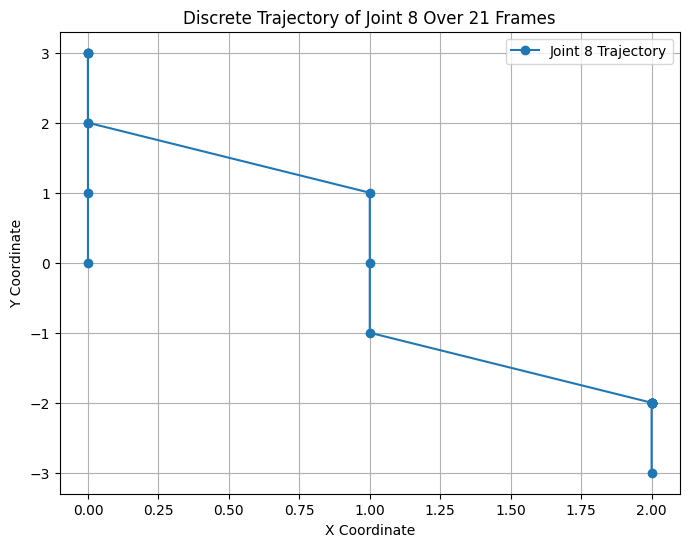

In [14]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def plot_discrete_trajectory(pkl_file_path, joint_index=8):
    """
    Plot the reconstructed trajectory based on discrete deltas for a specific joint.

    Parameters:
        pkl_file_path (str): Path to the saved discrete deltas pkl file.
        joint_index (int): Index of the joint to plot (default: 8 for joint 9).

    Returns:
        None
    """
    # Load the discrete delta dataset
    with open(pkl_file_path, 'rb') as f:
        data = pickle.load(f)
        
    # Extract discrete deltas
    discrete_deltas = data['discrete_deltas']  # Shape: (frames-1, points, 2)

    # Extract deltas for the selected joint
    joint_deltas = discrete_deltas[50:70, joint_index, :]  # Shape: (frames-1, 2)

    # Initialize the trajectory
    num_frames = joint_deltas.shape[0]
    trajectory = np.zeros((num_frames + 1, 2))  # Absolute positions

    # Reconstruct the trajectory by summing the discrete deltas
    for i in range(1, num_frames + 1):
        trajectory[i] = trajectory[i - 1] + joint_deltas[i - 1]

    # Extract x and y coordinates for plotting
    x_coords = trajectory[:, 0]
    y_coords = trajectory[:, 1]

    # Plot the reconstructed trajectory
    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, marker='o', linestyle='-', label=f'Joint {joint_index} Trajectory')
    plt.title(f"Discrete Trajectory of Joint {joint_index} Over {num_frames + 1} Frames")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.legend()
    plt.show()


# Example usage
pkl_file_path = "/nas/Chingiz/sing_language/newDATA_points/discrete_deltas_threshold.pkl"
plot_discrete_trajectory(pkl_file_path, joint_index=8)


In [15]:
import pickle
def read_pkl(path):
    with open(path, 'rb') as f:
        data1 = pickle.load(f)
    return data1

path_delta = '/nas/Chingiz/sing_language/newDATA_points/discrete_deltas_threshold.pkl' 

data_vector_vector = read_pkl(path_delta)

In [16]:
data_vector_vector.keys()

dict_keys(['discrete_deltas', 'point_type'])

In [17]:
data_vector_vector['point_type']

'hand_right'

In [18]:
data_vector_vector['discrete_deltas'][:10]

array([[[-1,  0],
        [ 0, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [ 0, -1],
        [ 0, -1],
        [ 0, -1],
        [ 1, -1],
        [ 1, -1],
        [ 1, -1],
        [ 1, -1],
        [ 1, -1],
        [ 1, -1],
        [ 1, -1],
        [ 1, -1],
        [ 0, -1],
        [ 1, -1],
        [ 1, -1],
        [ 0, -1]],

       [[ 1, -1],
        [-1,  0],
        [-1, -1],
        [ 1, -1],
        [ 1,  0],
        [ 1, -1],
        [ 1, -1],
        [ 1, -1],
        [ 1,  0],
        [-1,  0],
        [ 1, -1],
        [ 0, -1],
        [ 1,  0],
        [-1,  0],
        [ 1, -1],
        [ 1, -1],
        [ 1,  0],
        [ 0,  0],
        [ 1, -1],
        [ 1, -1],
        [ 1,  0]],

       [[ 0, -1],
        [ 1, -1],
        [ 1, -1],
        [ 0,  0],
        [ 1, -1],
        [ 0,  0],
        [ 1,  1],
        [ 1,  1],
        [ 0, -1],
        [ 1, -1],
        [ 1,  1],
        [ 1,  1],
        [-1, -1],
      

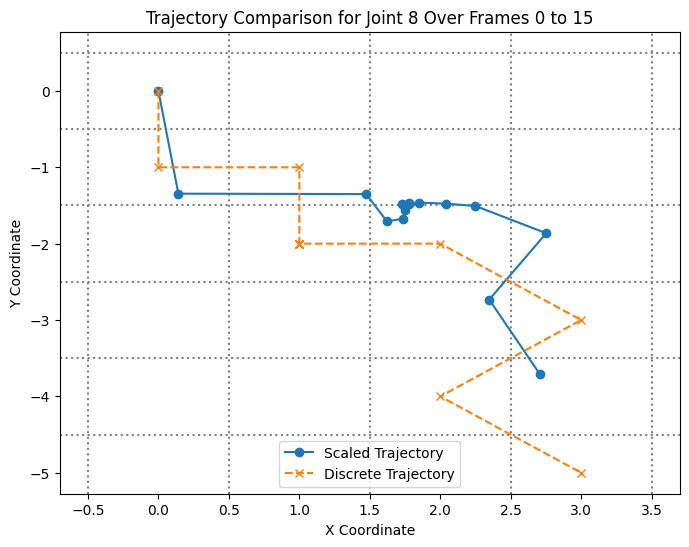

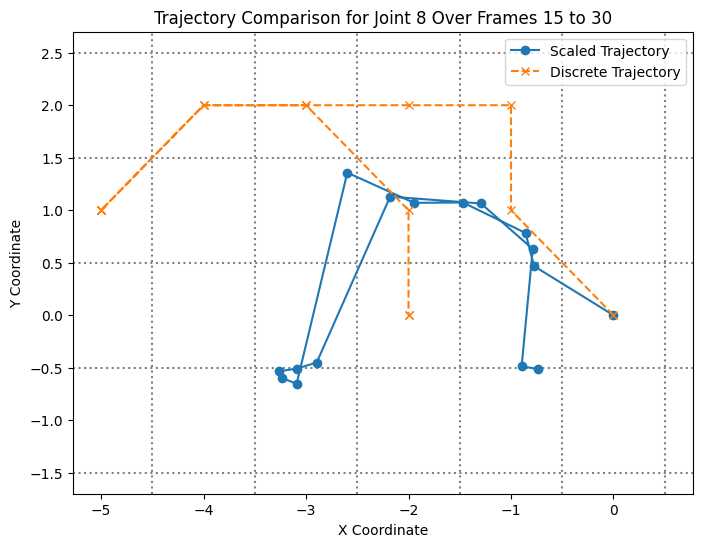

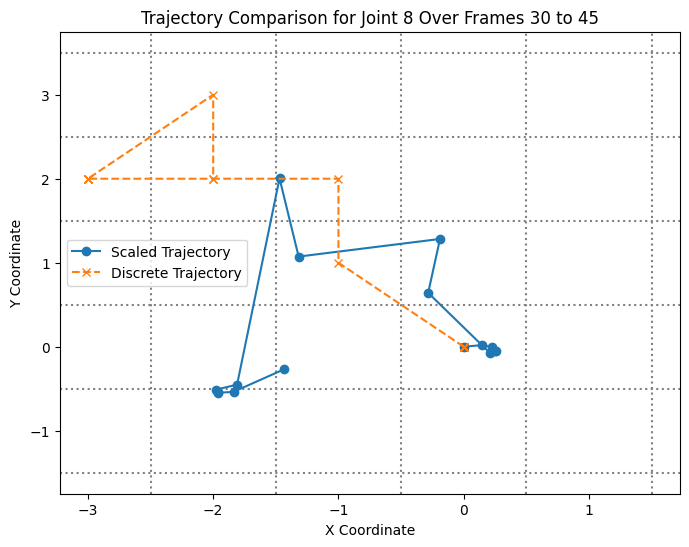

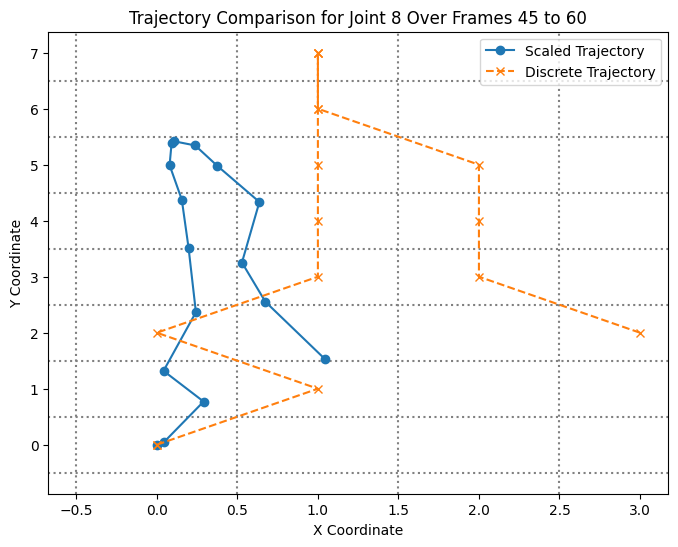

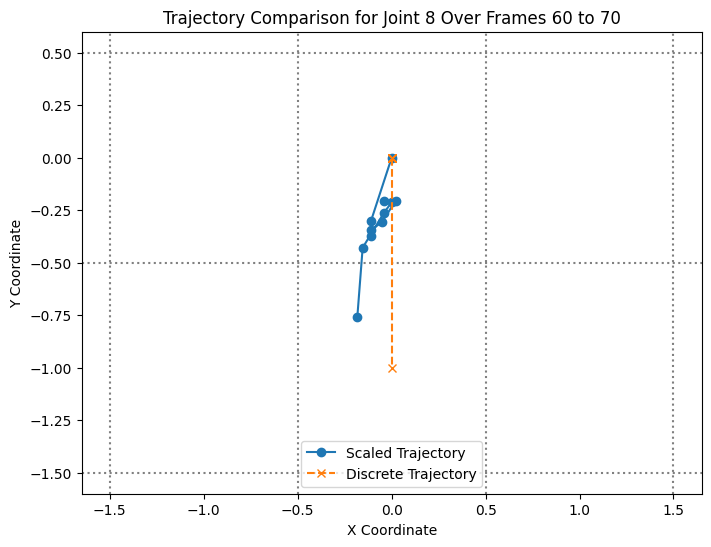

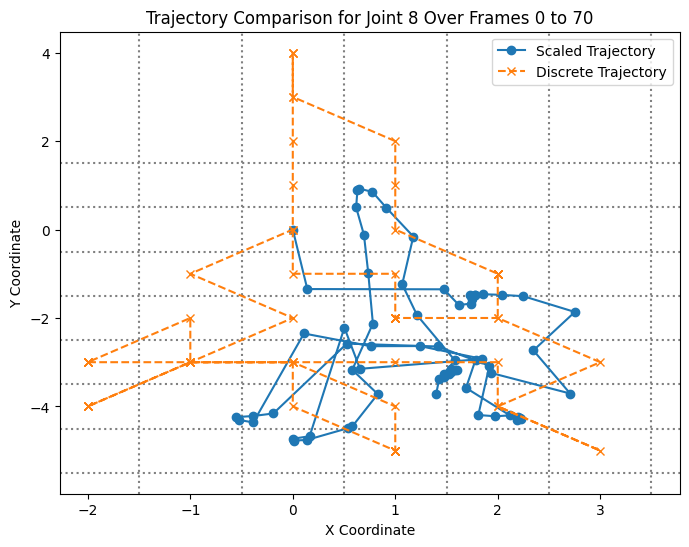

In [19]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def load_and_plot_combined_trajectory(scaled_pkl_path, discrete_pkl_path, joint_index=8, frame_range=(50, 70)):
    """
    Plot the reconstructed trajectory based on scaled and discrete deltas for a specific joint on the same graph.

    Parameters:
        scaled_pkl_path (str): Path to the saved scaled deltas pkl file.
        discrete_pkl_path (str): Path to the saved discrete deltas pkl file.
        joint_index (int): Index of the joint to plot (default: 8 for joint 9).
        frame_range (tuple): Range of frames to consider (default: (10, 20)).

    Returns:
        None
    """
    # Load the scaled delta dataset
    with open(scaled_pkl_path, 'rb') as f:
        scaled_data = pickle.load(f)

    # Load the discrete delta dataset
    with open(discrete_pkl_path, 'rb') as f:
        discrete_data = pickle.load(f)

    # Extract frame range
    start_frame, end_frame = frame_range

    # Extract scaled deltas
    scaled_deltas = scaled_data['scaled_deltas'][start_frame:end_frame, joint_index, :]  # Shape: (frames, 2)

    # Extract discrete deltas
    discrete_deltas = discrete_data['discrete_deltas'][start_frame:end_frame, joint_index, :]  # Shape: (frames, 2)

    # Initialize trajectories
    num_frames = scaled_deltas.shape[0]
    scaled_trajectory = np.zeros((num_frames + 1, 2))  # Absolute positions for scaled deltas
    discrete_trajectory = np.zeros((num_frames + 1, 2))  # Absolute positions for discrete deltas

    # Reconstruct scaled trajectory
    for i in range(1, num_frames + 1):
        scaled_trajectory[i] = scaled_trajectory[i - 1] + scaled_deltas[i - 1]

    # Reconstruct discrete trajectory
    for i in range(1, num_frames + 1):
        discrete_trajectory[i] = discrete_trajectory[i - 1] + discrete_deltas[i - 1]

    # Extract x and y coordinates for plotting
    scaled_x_coords, scaled_y_coords = scaled_trajectory[:, 0], scaled_trajectory[:, 1]
    discrete_x_coords, discrete_y_coords = discrete_trajectory[:, 0], discrete_trajectory[:, 1]

        # Plot the reconstructed trajectories
    plt.figure(figsize=(8, 6))
    
    # Draw grid lines
    grid_size = 1.0  
    x_min, x_max = min(scaled_x_coords), max(scaled_x_coords)
    y_min, y_max = min(scaled_y_coords), max(scaled_y_coords)
    
    # Draw vertical grid lines
    for x in np.arange(np.floor(x_min-1), np.ceil(x_max+1), grid_size):
        plt.axvline(x=x+0.5, color='gray', linestyle=':', alpha=1)
    
    # Draw horizontal grid lines  
    for y in np.arange(np.floor(y_min-1), np.ceil(y_max+1), grid_size):
        plt.axhline(y=y+0.5, color='gray', linestyle=':', alpha=1)
    
    plt.plot(scaled_x_coords, scaled_y_coords, marker='o', linestyle='-', label="Scaled Trajectory")
    plt.plot(discrete_x_coords, discrete_y_coords, marker='x', linestyle='--', label="Discrete Trajectory")
    plt.title(f"Trajectory Comparison for Joint {joint_index} Over Frames {start_frame} to {end_frame}")
    plt.xlabel('X Coordinate') 
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()


# Example usage
scaled_pkl_path = "/nas/Chingiz/sing_language/newDATA_points/scaled_deltas_threshold.pkl"
discrete_pkl_path = "/nas/Chingiz/sing_language/newDATA_points/discrete_deltas_threshold.pkl"

load_and_plot_combined_trajectory(scaled_pkl_path, discrete_pkl_path, joint_index=8, frame_range=(0, 15))
load_and_plot_combined_trajectory(scaled_pkl_path, discrete_pkl_path, joint_index=8, frame_range=(15, 30))
load_and_plot_combined_trajectory(scaled_pkl_path, discrete_pkl_path, joint_index=8, frame_range=(30, 45))
load_and_plot_combined_trajectory(scaled_pkl_path, discrete_pkl_path, joint_index=8, frame_range=(45, 60))
load_and_plot_combined_trajectory(scaled_pkl_path, discrete_pkl_path, joint_index=8, frame_range=(60, 70))
load_and_plot_combined_trajectory(scaled_pkl_path, discrete_pkl_path, joint_index=8, frame_range=(0, 70))
